# libs


In [ ]:
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score 

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
!pip install category_encoders
import category_encoders as ce

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data_3_1.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

In [ ]:
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "dicision"]
df

buying  maint  doors persons lug_boot safety dicision
0     vhigh  vhigh      2       2    small    med    unacc
1     vhigh  vhigh      2       2    small   high    unacc
2     vhigh  vhigh      2       2      med    low    unacc
3     vhigh  vhigh      2       2      med    med    unacc
4     vhigh  vhigh      2       2      med   high    unacc
...     ...    ...    ...     ...      ...    ...      ...
1722    low    low  5more    more      med    med     good
1723    low    low  5more    more      med   high    vgood
1724    low    low  5more    more      big    low    unacc
1725    low    low  5more    more      big    med     good
1726    low    low  5more    more      big   high    vgood

[1727 rows x 7 columns]

# 1 & 2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y=df['dicision']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   dicision  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# 3 FE

In [ ]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
X_train.head()

buying maint doors persons lug_boot safety
1232    med   low     3    more    small    low
562    high  high     2    more      med   high
1669    low   low     3    more      med   high
1234    med   low     3    more    small   high
1004    med  high     3       2      big    low

encoding

In [ ]:
#for i in df:
#    df[i] = df[i].astype('category')
#    df[i] = df[i].cat.codes
#df

In [ ]:
#X_test.head()

In [ ]:
#X_train.head()

In [ ]:
import category_encoders as ce

In [ ]:

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


buying  maint  doors  persons  lug_boot  safety
1232       1      1      1        1         1       1
562        2      2      2        1         2       2
1669       3      1      1        1         2       2
1234       1      1      1        1         1       2
1004       1      2      1        2         3       1

In [ ]:
df.head()

buying  maint doors persons lug_boot safety dicision
0  vhigh  vhigh     2       2    small    med    unacc
1  vhigh  vhigh     2       2    small   high    unacc
2  vhigh  vhigh     2       2      med    low    unacc
3  vhigh  vhigh     2       2      med    med    unacc
4  vhigh  vhigh     2       2      med   high    unacc

In [ ]:
X_test.head()

buying  maint  doors  persons  lug_boot  safety
97         2      2      1        1         1       1
836        4      3      1        2         3       3
780        4      3      2        3         1       2
1620       1      3      2        2         3       2
1041       3      4      3        1         1       2

#4 dicision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy:{0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy:0.8179


In [ ]:
print('Training-set accuracy score:{0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score:0.8407


# ezafi:))

[Text(265.05, 398.64, 'X[5] <= 1.5\nentropy = 1.21\nsamples = 1381\nvalue = [311, 52, 963, 55]'),
 Text(237.15, 326.15999999999997, 'entropy = 0.0\nsamples = 450\nvalue = [0, 0, 450, 0]'),
 Text(292.95000000000005, 326.15999999999997, 'X[3] <= 2.5\nentropy = 1.476\nsamples = 931\nvalue = [311, 52, 513, 55]'),
 Text(139.5, 253.67999999999998, 'X[3] <= 1.5\nentropy = 1.264\nsamples = 631\nvalue = [153, 25, 425, 28]'),
 Text(111.60000000000001, 181.2, 'X[0] <= 3.5\nentropy = 1.636\nsamples = 316\nvalue = [153, 25, 110, 28]'),
 Text(55.800000000000004, 108.71999999999997, 'X[4] <= 1.5\nentropy = 1.702\nsamples = 234\nvalue = [122, 25, 59, 28]'),
 Text(27.900000000000002, 36.23999999999995, 'entropy = 1.269\nsamples = 78\nvalue = [32, 5, 41, 0]'),
 Text(83.7, 36.23999999999995, 'entropy = 1.642\nsamples = 156\nvalue = [90, 20, 18, 28]'),
 Text(167.4, 108.71999999999997, 'X[1] <= 1.5\nentropy = 0.957\nsamples = 82\nvalue = [31, 0, 51, 0]'),
 Text(139.5, 36.23999999999995, 'entropy = 0.61\nsa

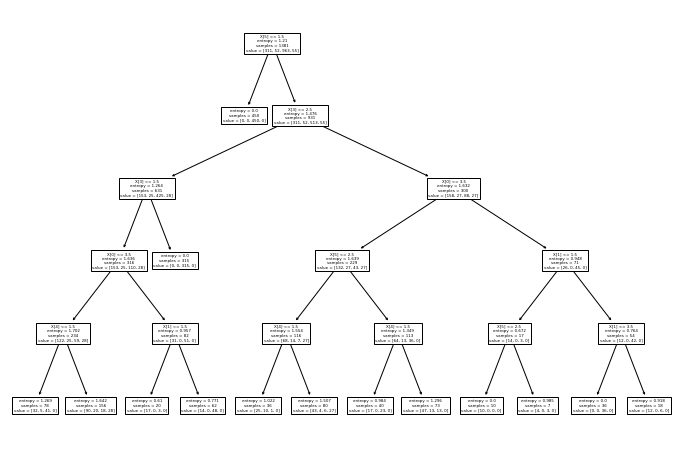

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

# graphviz

In [ ]:
import graphviz 

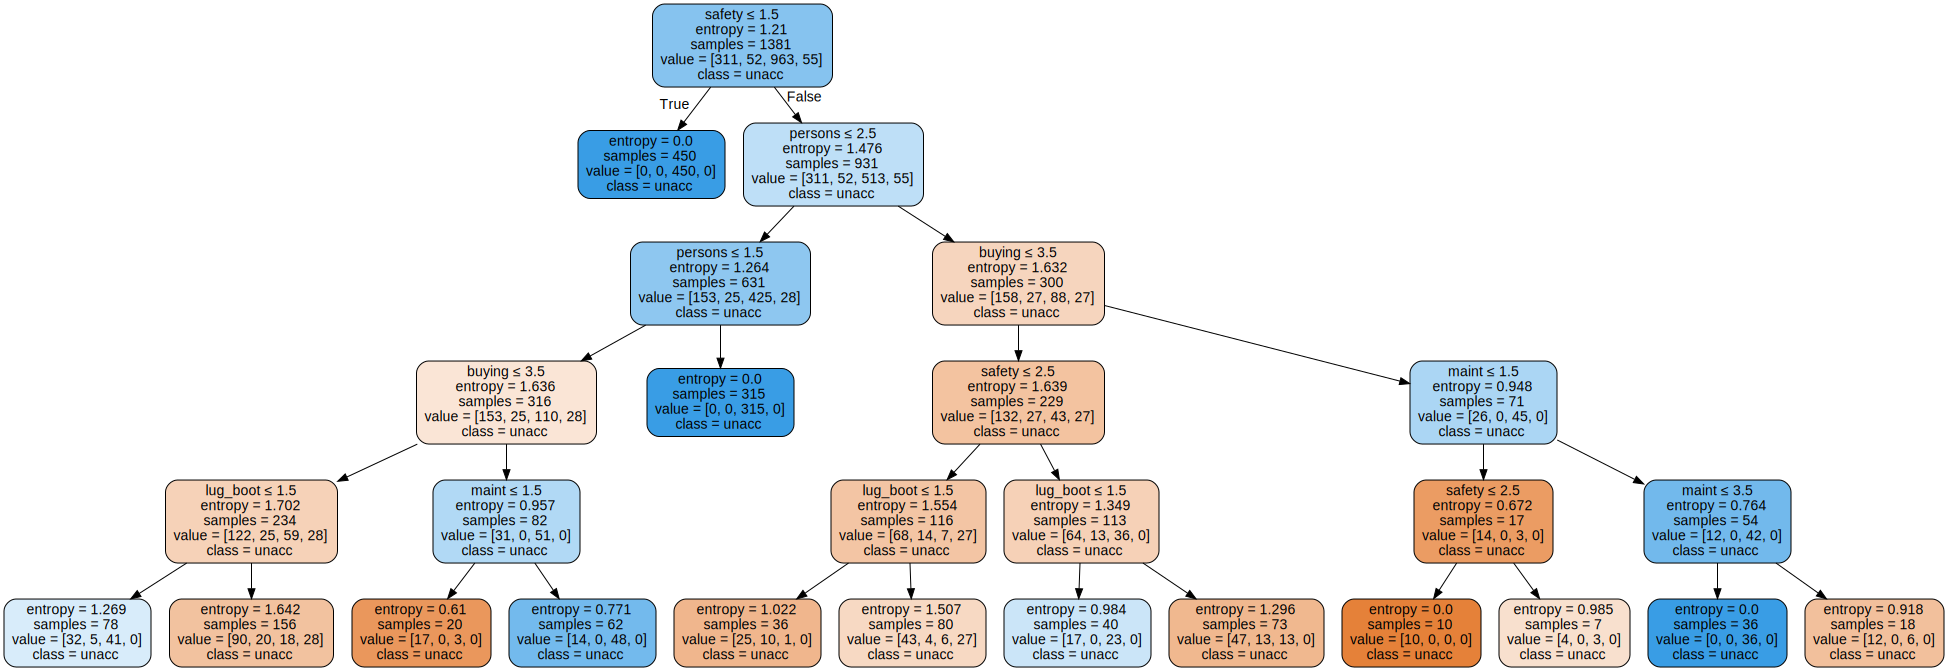

In [ ]:

dot_data = tree.export_graphviz(clf_en,feature_names=X_train.columns,class_names=y_train
                                ,out_file=None,filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph

classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.57      0.81      0.67        73
        good       0.00      0.00      0.00        17
       unacc       0.93      0.91      0.92       246
       vgood       0.00      0.00      0.00        10

    accuracy                           0.82       346
   macro avg       0.37      0.43      0.40       346
weighted avg       0.78      0.82      0.79       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2 cell paeen soal shavad hengam erae

Text(0.5, 15.0, 'Predicted label')

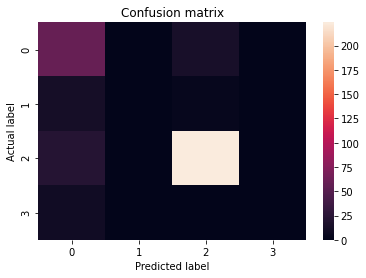

In [ ]:

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_en)
p = sns.heatmap(pd.DataFrame(cnf_matrix))
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_en)
pd.crosstab(y_test, y_pred_en, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  acc  unacc  All
True                      
acc         59     14   73
good        13      4   17
unacc       22    224  246
vgood       10      0   10
All        104    242  346

# 5 dar file jodagane
